In [55]:
import gym, random
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

In [68]:
generations = 300
individuals = 2
pvariance = 0.05
ppvariance = 0.02
nhiddens = 5
steps = 200
variation = 0.5

ninputs = env.observation_space.shape[0]
if (isinstance(env.action_space, gym.spaces.box.Box)):
	noutputs = env.action_space.shape[0]
else:
	noutputs = env.action_space.n
# initialize the training parameters randomly by using a gaussian distribution with average 0.0 and variance 0.1
# biases (thresholds) are initialized to 0.0
W1 = np.random.randn(nhiddens, ninputs) * pvariance
W2 = np.random.randn(noutputs, nhiddens) * pvariance
b1 = np.zeros(shape=(nhiddens, 1))
b2 = np.zeros(shape=(noutputs, 1))

num1 = W1.flatten().shape[0]
num2 = b1.flatten().shape[0]
num3 = W2.flatten().shape[0]
num4 = b2.flatten().shape[0]

p = W1.flatten().shape[0] + b1.flatten().shape[0] + W2.flatten().shape[0] + b2.flatten().shape[0]
pop_size = (individuals,p)
v = np.concatenate((W1.flatten(), b1.flatten(), W2.flatten(), b2.flatten()),axis=0)
population = np.vstack((v,v))
print(population.shape)

(2, 37)


In [69]:
best_outputs = []
for i in range (generations):
    reward_population = []
    for j in range(individuals):
        ind = population[j, :]
        W1 = ind[0:num1].reshape(nhiddens, ninputs)
        b1 = ind[num1:num1+num2].reshape(nhiddens, 1)
        W2 = ind[num2:num2+num3].reshape(noutputs,nhiddens)
        b2 = ind[num3:num3+num4].reshape(noutputs, 1)
#         W2 = np.random.randn(noutputs, nhiddens) * pvariance
#         b1 = np.zeros(shape=(nhiddens, 1))
#         b2 = np.zeros(shape=(noutputs, 1))
        state = env.reset()
        reward_individual = 0
        done = False
        for step in range (steps):
            state.resize(ninputs,1)
            Z1 = np.dot(W1, state) + b1
            A1 = np.tanh(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = np.tanh(Z2)

            if (isinstance(env.action_space, gym.spaces.box.Box)):
                action = A2
            else:
                action = np.argmax(A2)
            new_state, reward, done, info = env.step(action)

            state = new_state
            reward_individual = reward_individual + reward

            if done==True:
                break
        reward_population.append(reward_individual)
    fitness = np.asarray(reward_population)
    min_loc = np.argmin(fitness)
    max_loc = np.argmax(fitness)
    best_outputs.append(np.max(fitness))
    new_pop = np.random.rand(1,p)*variation
#     population[min_loc, :] = population[max_loc, :] + new_pop
    population[min_loc, :] = new_pop


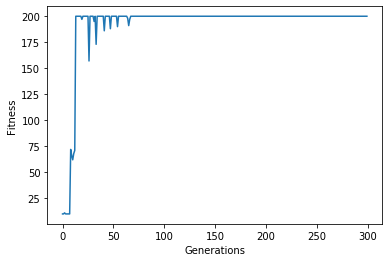

In [70]:

plt.plot(best_outputs)
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.show()